# WeatherPy
----
In the script below, we explore the relationship between latitude and weather in cities. The Open Weather API was used to retrieve and plot data from 579 randomly selected cities to investigate the relationship between weather parameters and latitude. I used Matplotlib, Pandas, Numpy, Requests, Time, Scipy, Open Weather API, and Citipy to accomplish our task. 

#### Anaylsis
* Observing the data, we can see that there is a very strong correlation between latitude and max temperature, and that the further away a city is from the equator, the lower the max temperature will be.
* The correlation between humidity, cloudiness, and wind speed vs. latitude did not appear to be significant. As shown in the plots, the linear regression lines were essentially flat. 
* The cloudiness and lattitude plot shows that the majority of cities are either extremely cloudy or not cloudy at all, with fewer cities in between.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [7]:
# Save config information
url =  "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Set up lists to hold response info
latitude = []
longitude = []
max_temp = []
humidity = []
cloud_coverage = []
wind_speed = []
country = []
datetime = []
city_list = []
# Set up counters
record = 0
sets = 1

# Create print statement to start data retrieval
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Loop through each city
for city in cities:
    
    # Start the counter and print number and city name currently retrieving data for
    record = record + 1
    print(f"Processing Record {record} of Set {sets} | {city}")
    
    # Create if statement to move to the next set when record hits 50     
    if record == 50:
        record = 0
        sets = sets + 1        
    
    # Try to perform a request for data on each and store in empty list
    try:
        
        # Build query URL
        query_url = f"{url}appid={weather_api_key}&units={units}&q="
        
        # Make request and store response 
        response = requests.get(query_url + city).json()
        
        # Append data to list
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud_coverage.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        datetime.append(response['dt'])
        city_list.append(response['name'])
    
    # Handle exceptions for a city that is not available with print statement
    except:
        print(f"City not found. Skipping...")
            
# Print statement for completion
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hambantota
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | fortuna
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | celestun
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | monrovia
Processing Record 16 of Set 1 | saint-pierre
Processing Record 17 of Set 1 | aklavik
Processing Record 18 of Set 1 | grindavik
Processing Record 19 of Set 1 | katsuura
Processing Record 20 of Set 1 | hobyo
Processing Record 21 of Set 1 | terney
Processing Record 22 of Set 1 | alotau
City not found. Skipping...
Processing Record 23

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a DataFrame
weather_dict = {
    "City": city_list,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloud_coverage,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": datetime }
weather_data = pd.DataFrame(weather_dict)

# Export the city data into a .csv
weather_data.to_csv(output_data_file, index = False)

# Display the DataFrame
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hambantota,6.1241,81.1185,73.74,100,20,2.30,LK,1667181777
1,Hilo,19.7297,-155.0900,81.25,93,36,3.00,US,1667181777
2,Fortuna,40.5982,-124.1573,54.09,85,19,1.99,US,1667181778
3,Qaanaaq,77.4840,-69.3632,-6.11,71,7,7.96,GL,1667181778
4,Mar del Plata,-38.0023,-57.5575,50.88,71,6,8.99,AR,1667181779


In [9]:
# Create a summary statistics table for weather data
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,20.367717,18.195762,58.170259,73.067358,58.074266,7.844093,1.667182e+09
std,33.343410,89.384671,21.896629,19.333370,40.584565,5.729283,1.181721e+02
min,-54.800000,-179.166700,-15.810000,1.000000,0.000000,0.000000,1.667181e+09
25%,-7.973850,-59.971300,46.805000,62.000000,12.000000,3.440000,1.667182e+09
50%,22.890900,24.731400,62.530000,77.000000,71.000000,6.330000,1.667182e+09
75%,48.213800,95.274850,75.765000,88.000000,100.000000,11.195000,1.667182e+09
max,78.218600,179.316700,100.170000,100.000000,100.000000,28.770000,1.667182e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

This step was skipped since no cities had humidity that was greater than 100. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

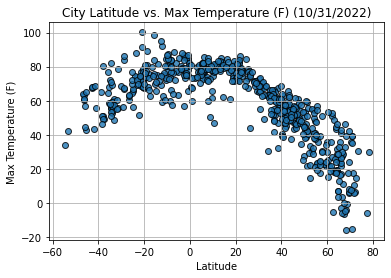

In [41]:
# Create a Scatter Plot for Latitude vs. Temperature
date = time.strftime("%m/%d/%Y")
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolor = "k")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (F) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsTemperaturePlot.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

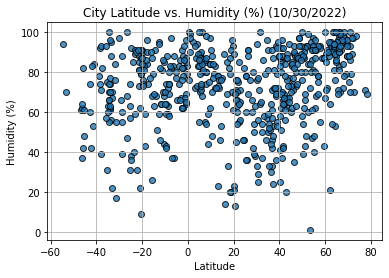

In [13]:
# Create a Scatter Plot for Latitude vs. Humidity
date = time.strftime("%m/%d/%Y")
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (%) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsHumidtyPlot.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

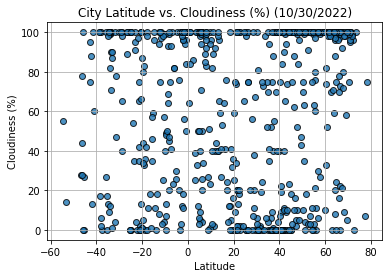

In [14]:
# Create a Scatter Plot for Latitude vs. Cloudiness
date = time.strftime("%m/%d/%Y")
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness (%) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsCloudinessPlot.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

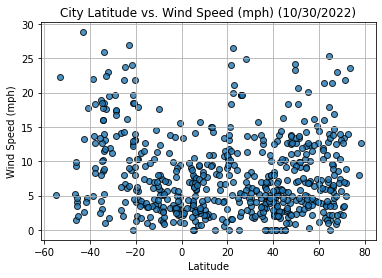

In [15]:
# Create a Scatter Plot for Latitude vs. Wind Speed
date = time.strftime("%m/%d/%Y")
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed (mph) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsWindSpeedPlot.png")

# Show plot
plt.show()

## Linear Regression

In [16]:
# Create DataFrames for Northern and Southern Hemisphere
north = weather_data.loc[weather_data["Lat"] >= 0]
south = weather_data.loc[weather_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7543794156121283


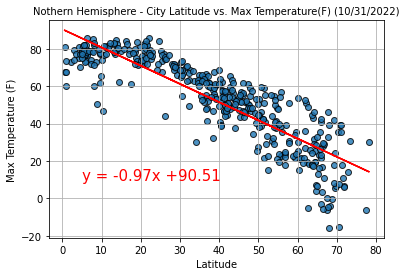

In [47]:
# Create a Scatter Plot for Latitude vs. Temperature for Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north['Lat']
y_values = north['Max Temp']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(5,10),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Nothern Hemisphere - City Latitude vs. Max Temperature(F) ({date})', fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/NorthernHemisphereLatitudeVsTemperaturePlot.png")

# Show plot
plt.show()

A linear regression model is shown here displaying latitude and maximum temperature of random cities in the northern hemisphere. As can be seen from the plot above, there is a strong, negative correlation between latitude and maximum temperature. In other words, the further a city is from the equator, the lower its maximum temperature will be.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.42004372037347615


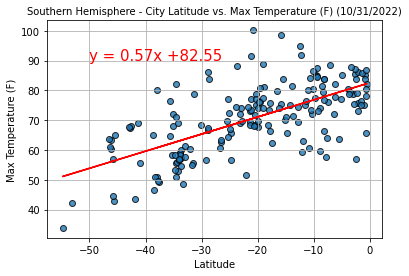

In [48]:
# Create a Scatter Plot for Latitude vs. Temperature for Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south['Lat']
y_values = south['Max Temp']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-50,90),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere - City Latitude vs. Max Temperature (F) ({date})', fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/SouthernHemisphereLatitudeVsTemperaturePlot.png")

# Show plot
plt.show()

A linear regression model is shown here displaying latitude and maximum temperature of random cities in the southern hemisphere. As can be seen from the plot above, there is a strong, positive correlation between latitude and maximum temperature. Cities closer to the equator, therefore, have a higher maximum temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04339216995506511


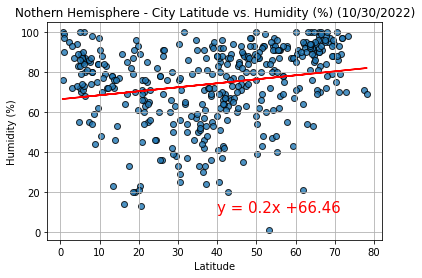

In [19]:
# Create a Scatter Plot for Latitude vs. Humidity for Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north['Lat']
y_values = north['Humidity']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(40,10),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Nothern Hemisphere - City Latitude vs. Humidity (%) ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/NorthernHemisphereLatitudeVsHumidityPlot.png")

# Show plot
plt.show()

A linear regression model displaying humidity and latitude for random cities in the northern hemisphere is shown above. The two have a very small, positive correlation, but not enough to be significant. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02256595457376277


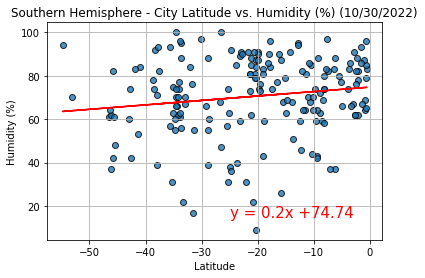

In [20]:
# Create a Scatter Plot for Latitude vs. Humidity for Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south['Lat']
y_values = south['Humidity']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-25,15),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere - City Latitude vs. Humidity (%) ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/SouthernHemisphereLatitudeVsHumidityPlot.png")

# Show plot
plt.show()

A linear regression model displaying humidity and latitude for random cities in the southern hemisphere is shown above. Same as the northern hemisphere, the two have a very small, positive correlation, but not enough to be significant. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.035059597017357676


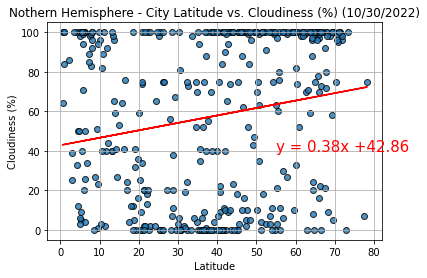

In [25]:
# Create a Scatter Plot for Latitude vs. Cloudiness for Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north['Lat']
y_values = north['Cloudiness']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(55,40),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Nothern Hemisphere - City Latitude vs. Cloudiness (%) ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/NorthernHemisphereLatitudeVsCloudinessPlot.png")

# Show plot
plt.show()

A linear regression model is shown here displaying the latitude and cloudiness of random cities in the northern hemisphere. As seen from the plot above, there is a weak, positive correlation between the two, but not enough to draw conclusions from.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0031576670868497195


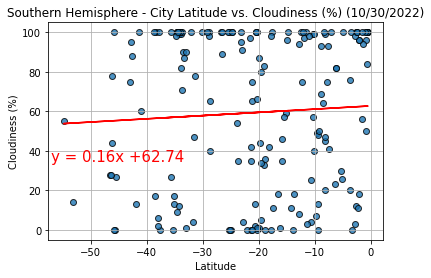

In [29]:
# Create a Scatter Plot for Latitude vs. Cloudiness for Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south['Lat']
y_values = south['Cloudiness']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-57,35),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere - City Latitude vs. Cloudiness (%) ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/SouthernHemisphereLatitudeVsCloudinessPlot.png")

# Show plot
plt.show()

A linear regression model is shown here displaying the latitude and cloudiness of random cities in the southern hemisphere. As seen from the data above, there is a very small, positive correlation between the two, but not enough to draw conclusions from. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.020591031081518454


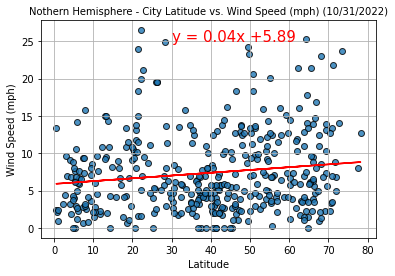

In [49]:
# Create a Scatter Plot for Latitude vs. Temperature for Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north['Lat']
y_values = north['Wind Speed']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(30,25),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Nothern Hemisphere - City Latitude vs. Wind Speed (mph) ({date})', fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/NorthernHemisphereLatitudeVsWindSpeedPlot.png")

# Show plot
plt.show()

A linear regression model displaying the latitude and the wind speed for random cities located in the northern hemisphere is shown above. Inferable conclusions cannot be drawn from the data, but there is a very weak, positive correlation between them.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12231475940967605


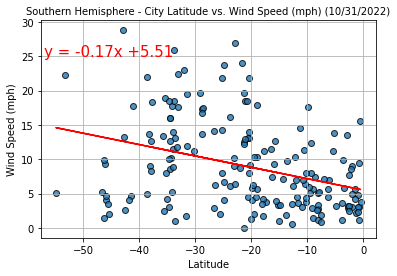

In [50]:
# Create a Scatter Plot for Latitude vs. Temperature for Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south['Lat']
y_values = south['Wind Speed']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-57,25),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere - City Latitude vs. Wind Speed (mph) ({date})', fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/SouthernHemisphereLatitudeVsWindSpeedPlot.png")

# Show plot
plt.show()

A linear regression model displaying the latitude and the wind speed for random cities located in the southern hemisphere is shown above. Inferable conclusions cannot be drawn from the data, but there is a weak, negative correlation between them.